# Curso de Big Data. Otoño 2024 - Grupo 4

## Trabajo Práctico 1 - Parte 2

## Integrantes: Federico Saucedo, Manuel Soares Gache, Maximiliano Cucher

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo 24 de marzo a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: v.oubina@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [2]:
import requests

In [5]:
# Usando el codigo qu evimos en clase, buscamos r=el item remera de boca
buscar = "remera de boca"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

<Response [200]>


In [6]:
# Pero podríamos guardar el resultado en un diccionario (json)
data = response.json()
#type(data) # dict
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'remera de boca',
 'paging': {'total': 25, 'primary_results': 25, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1387743155',
   'title': 'Camiseta Boca Jr Edicion Golden Algodon.',
   'condition': 'new',
   'thumbnail_id': '688537-MLA73309957617_122023',
   'catalog_product_id': None,
   'listing_type_id': 'gold_special',
   'permalink': 'https://articulo.mercadolibre.com.ar/MLA-1387743155-camiseta-boca-jr-edicion-golden-algodon-_JM',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA1286',
   'domain_id': 'MLA-FOOTBALL_SHIRTS',
   'thumbnail': 'http://http2.mlstatic.com/D_688537-MLA73309957617_122023-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 27193.72,
   'original_price': None,
   'sale_price': None,
   'available_quantity': 1,
   'official_store_id': None,
   'use_thumbnail_id': True,
   'accepts_mercadopago': True,
   'variation_filters': ['COLOR', 'SIZE'],

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [7]:
import pandas as pd

In [8]:
# Primero creamos una variable que se llame precios que sea igual al item "price" dentro de "resultas" en el diccionario data
precios = [item['price'] for item in data['results']]
df = pd.DataFrame(precios, columns=['Precio'])

# Calculamos el precio promedio, mínimo y máximo
precio_promedio = df['Precio'].mean()
precio_minimo = df['Precio'].min()
precio_maximo = df['Precio'].max()

# Imprimimos los resultados
print("Precio promedio:", precio_promedio)
print("Precio mínimo:", precio_minimo)
print("Precio máximo:", precio_maximo)

Precio promedio: 21614.74
Precio mínimo: 6999.0
Precio máximo: 38990.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

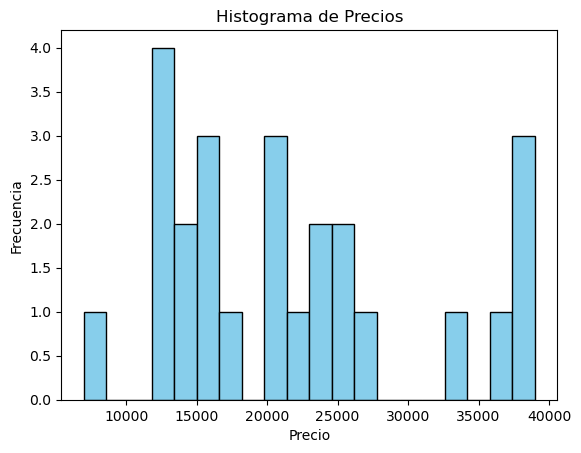

In [10]:
import matplotlib.pyplot as plt

# Crear histograma
plt.hist(precios, bins=20, color='skyblue', edgecolor='black')

# Agregar título y etiquetas
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


Lo que vemos del histograma es que no pareciera haber ningun outlier. Si bien parace haber un precio rondando los 7.000 pesos, no lo consideramos outlier.

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [3]:
# Lo primero que hacemso es reperir lo del ejericio 1 ya que queremos encontrar el seller id de la pagina oficial de Samsung. Luego ese id lo utilizaremos para encontrarlos items publicados de este vendedor.
buscar = "samsung"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

<Response [200]>


In [4]:
# Pero podríamos guardar el resultado en un diccionario (json)
data2 = response.json()
#type(data) # dict
data2

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'samsung',
 'paging': {'total': 160462,
  'primary_results': 1000,
  'offset': 0,
  'limit': 50},
 'results': [{'id': 'MLA1308669513',
   'title': 'Samsung Galaxy A04s 4 + 128gb Negro',
   'condition': 'new',
   'thumbnail_id': '843497-MLA53347631965_012023',
   'catalog_product_id': 'MLA21027027',
   'listing_type_id': 'gold_pro',
   'permalink': 'https://www.mercadolibre.com.ar/samsung-galaxy-a04s-4-128gb-negro/p/MLA21027027',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA1055',
   'domain_id': 'MLA-CELLPHONES',
   'thumbnail': 'http://http2.mlstatic.com/D_843497-MLA53347631965_012023-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 199999,
   'original_price': 314999,
   'sale_price': None,
   'available_quantity': 100,
   'official_store_id': 1938,
   'official_store_name': 'Mercado Libre Electronica',
   'use_thumbnail_id': True,
   'accepts_mercadopago': True,
 

In [5]:
# Aqui lo que hacemos es entrar a la api de meli y fijarnos como buscar los items publicados de un vendedor, copiamos el codigo y completamos con el seller id de Samsung que lo ubtivimos arriba
url = "https://api.mercadolibre.com/sites/MLA/search?seller_id=368534201"

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

<Response [200]>


In [6]:
# Pero podríamos guardar el resultado en un diccionario (json)
data3 = response.json()
#type(data) # dict
data3

{'site_id': 'MLA',
 'seller': {'id': 368534201, 'nickname': 'SAMSUNG_TIENDA_OFICIAL_TV'},
 'country_default_time_zone': 'GMT-03:00',
 'paging': {'total': 66, 'primary_results': 66, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1658634066',
   'title': 'Samsung Galaxy A14 128gb 4gb Ram Silver',
   'condition': 'new',
   'thumbnail_id': '952200-MLA54920697650_042023',
   'catalog_product_id': 'MLA22592543',
   'listing_type_id': 'gold_pro',
   'permalink': 'https://www.mercadolibre.com.ar/samsung-galaxy-a14-128gb-4gb-ram-silver/p/MLA22592543',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA1055',
   'domain_id': 'MLA-CELLPHONES',
   'thumbnail': 'http://http2.mlstatic.com/D_952200-MLA54920697650_042023-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 299999,
   'original_price': 434999,
   'sale_price': None,
   'available_quantity': 1,
   'official_store_id': 1550,
   'official_store_name': 'Samsung',
   'use_thumbnail_id': True,
   'a

In [8]:
# Nos parecio intersenate buscar cuantos de los productos publicados tenian promociones, para ello, bucamos dentro de cada diccionario si cada producto tenia un orignal price, ya que de ser asi, esto sigificaba que habia discrepancia entre el original price y el price normal, por lo que tendria promocion
count = 0 
# Iteramos sobre los resultados para contar los productos que cumplen con el criterio
for result in data3['results']:
    if result.get('original_price') is not None:
        count += 1
print("Cantidad de productos con descuento dentro de Samsung:", count)

Cantidad de productos con descuanto dentro de Samsung: 5


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [9]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = 'https://www.lanacion.com.ar/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Encuentra todos los elementos 'article' con la clase 'ln-card'
articles = soup.find_all('article', class_='ln-card')

# Inicializamos una lista para almacenar los enlaces
links = []

# Itera sobre los elementos 'article' y obtén los enlaces de los elementos 'a' dentro de ellos
for article in articles:
    link = article.find('a')['href']
    if not link.startswith('http'): # Si los links no empeizan con https://www.lanacion.com.ar/ lo que hacemos es usar append para pegarle este link al principio de los links que ya rescatamos
        link = 'https://www.lanacion.com.ar' + link
    links.append(link)

# Creamos un DataFrame con los enlaces
df = pd.DataFrame({'Links': links})

# Exportamos el DataFrame a un archivo Excel
df.to_excel('links_lanacion1.xlsx', index=False)

print("Enlaces de las noticias guardados en 'links_lanacion1.xlsx'")

Enlaces de las noticias guardados en 'links_lanacion1.xlsx'
